C:\Users\17809\AppData\Roaming\Python\Python38\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Train: 0.982, Test: 0.984


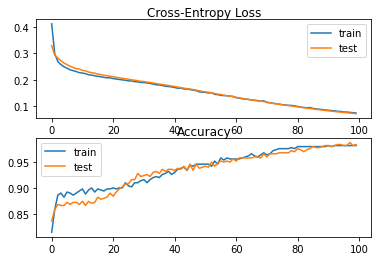

In [1]:
# mlp for the two moons problem with batchnorm after activation function
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

# generate 2d classification dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

def plot(history):
    plt.subplot(211)
    plt.title('Cross-Entropy Loss', pad=-40)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()

    plt.subplot(212)
    plt.title('Accuracy', pad=-40)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

# model without batch norm
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plot(history)

Train: 1.000, Test: 1.000


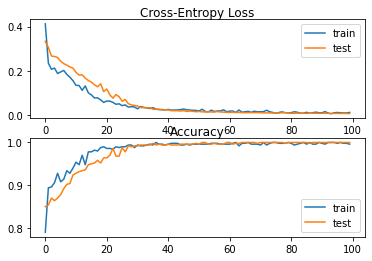

In [2]:
# model with batch norm following the activation function
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plot(history)

Train: 0.996, Test: 0.994


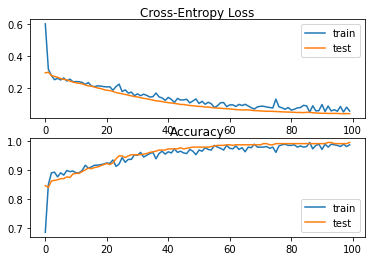

In [4]:
# model with batch norm preceding the activation function
from keras.layers import Activation

model = Sequential()
model.add(Dense(50, input_dim=2, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plot(history)